#  <span style='color:midnightblue'>  Customer Lifetime Value using RFM Model


##  <span style='color:royalblue'>  1. Load required libraries </span>

In [42]:
library(rfm)
library(lubridate)
library(knitr)
library(kableExtra)
library(magrittr)
library(dplyr)
library(ggplot2)
library(DT)
library(grDevices)
library(RColorBrewer)
library(treemap)
library(readxl)
library(skimr)
library(RColorBrewer)

##  <span style='color:royalblue'>  2. Load dataset </span>

In [2]:
EU_Superstore <- read_excel("./superstore.xlsx")

##  <span style='color:royalblue'>  3. Inspect dataset </span>

In [3]:
head(EU_Superstore,5)

Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0,39.60
2,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0,0.00
3,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0,16.11
4,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0,13.20
5,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0,73.71


In [4]:
skim(EU_Superstore)

── Data Summary ────────────────────────
                           Values       
Name                       EU_Superstore
Number of rows             10000        
Number of columns          20           
_______________________                 
Column type frequency:                  
  POSIXct                  2            
  character                13           
  numeric                  5            
________________________                
Group variables            None         

── Variable type: POSIXct ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min                 max                
1 Order Date            0             1 2015-01-01 00:00:00 2018-12-31 00:00:00
2 Ship Date             0             1 2015-01-05 00:00:00 2019-01-05 00:00:00
  median              n_unique
1 2017-07-09 00:00:00     1253
2 2017-07-11 00:00:00     1365

── Variable type: character ────────────────────────────────────────────────────
   skim_var

##  <span style='color:royalblue'>  4. Data manipulation </span>

In [5]:
#change the date-related factor to date
EU_Superstore$`Order Date` <- as.Date(EU_Superstore$`Order Date`, format="%y-%m-%d")

In [6]:
#set the analysis date (to calculate recency)
analysis_date <-lubridate::as_date("2019-01-01")

In [7]:
#Change the column name. This shouldn't be necessary, but I found the code to be often problematic if not changed. 
names(EU_Superstore)[names(EU_Superstore) == "Customer ID"] <- "customer_id"
names(EU_Superstore)[names(EU_Superstore) == "Order Date"] <- "order_date"
names(EU_Superstore)[names(EU_Superstore) == "Sales"] <- "revenue"

##  <span style='color:royalblue'>  5. RFM Modeling  </span>

> **Recency** refers to the last time that a customer made a purchase. A customer who has made a purchase recently is more likely to make a repeat purchase than a customer who hasn’t made a purchase in a long time.

> **Frequency** refers to how many times a customer has made a purchase within a given time frame. A customer who makes purchases often is more likely to continue to come back than a customer who rarely makes purchases.

> **Monetary Value** refers to the amount of money a customer has spent within that same time frame. A customer who makes larger purchases is more likely to return than a customer who spends less.

### **How to do an RMF model?** 
1. Using purchase history, typically assign a score from 1 to 5 to recency, frequency and monetary values individually for each customer.
2. Five is the best/highest value, and one is the lowest/worst value.
3. A final RFM score is calculated simply by combining individual RFM score numbers to create a three digit number.

In [8]:
rfm_result <- rfm_table_order(EU_Superstore, customer_id, order_date, revenue, analysis_date)
head(rfm_result$rfm,5)

customer_id,date_most_recent,recency_days,transaction_count,amount,recency_score,frequency_score,monetary_score,rfm_score
AA-10315,2018-12-18,14,16,6105.627,5,4,5,545
AA-10375,2018-02-17,318,7,560.082,1,1,1,111
AA-10480,2018-05-16,230,10,5254.457,2,2,4,224
AA-10645,2018-05-12,234,16,2730.207,1,4,3,143
AB-10015,2018-04-23,253,24,6116.454,1,5,5,155


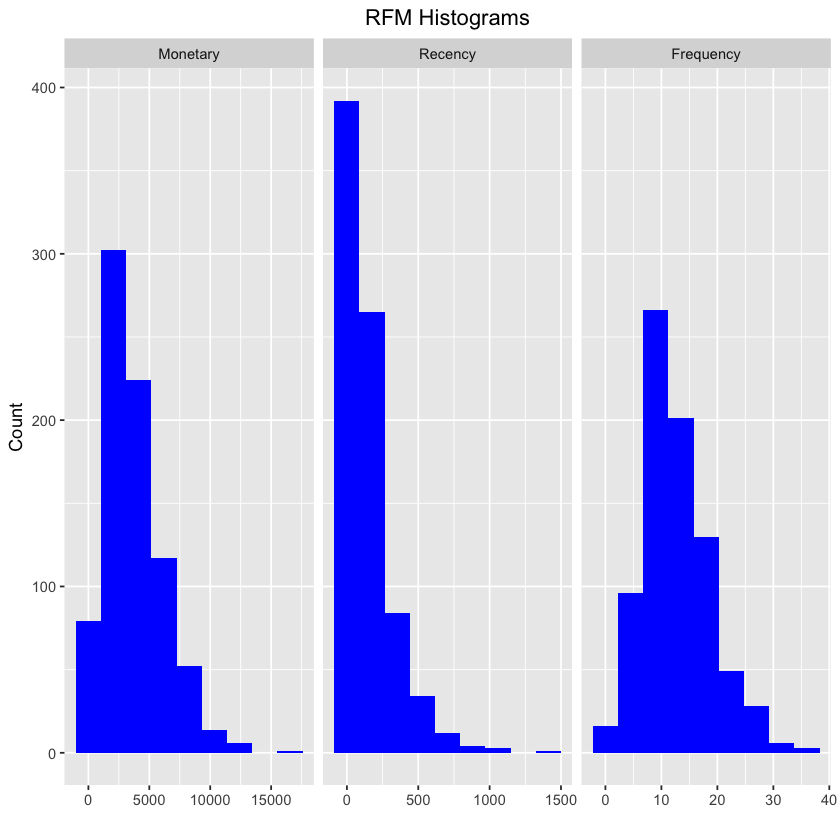

In [9]:
#histogram
rfm_histograms(rfm_result)

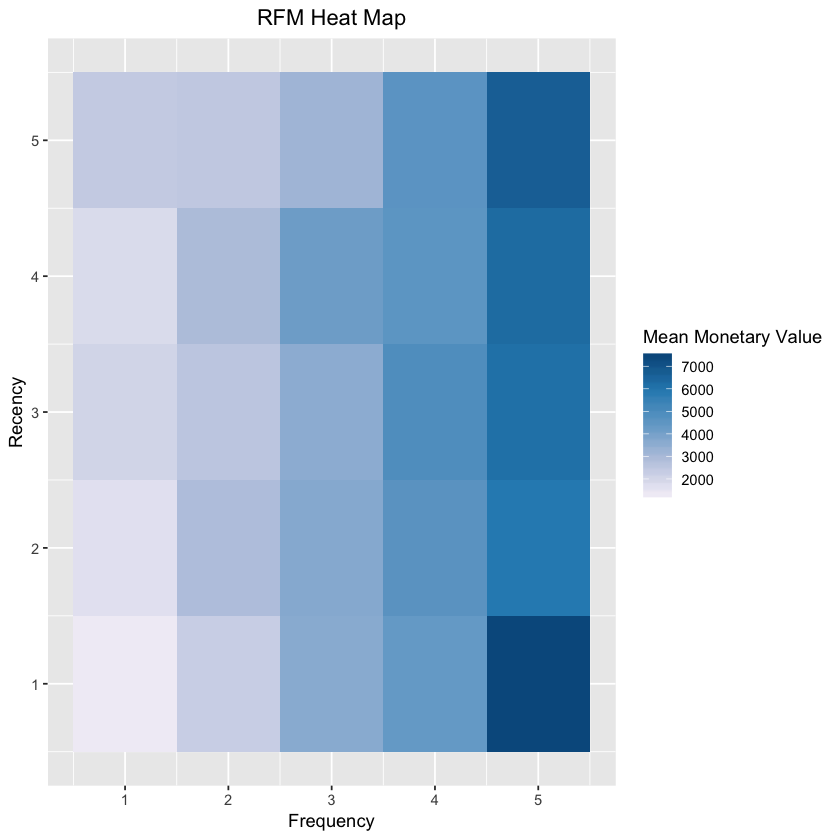

In [10]:
#heatmap
rfm_heatmap(rfm_result)

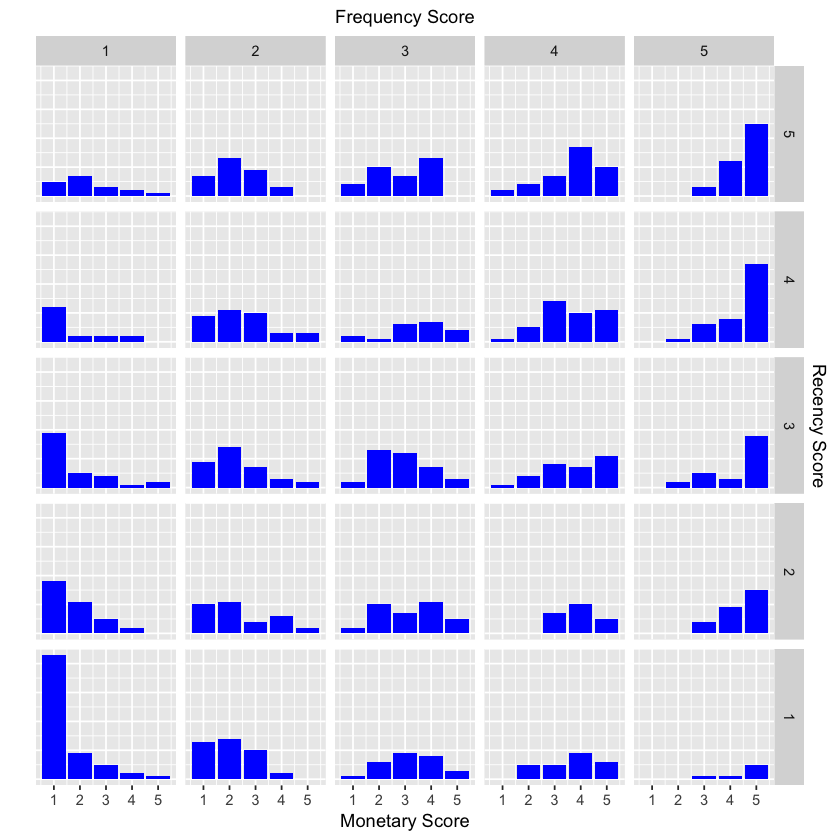

In [11]:
#Barchart
rfm_bar_chart(rfm_result)

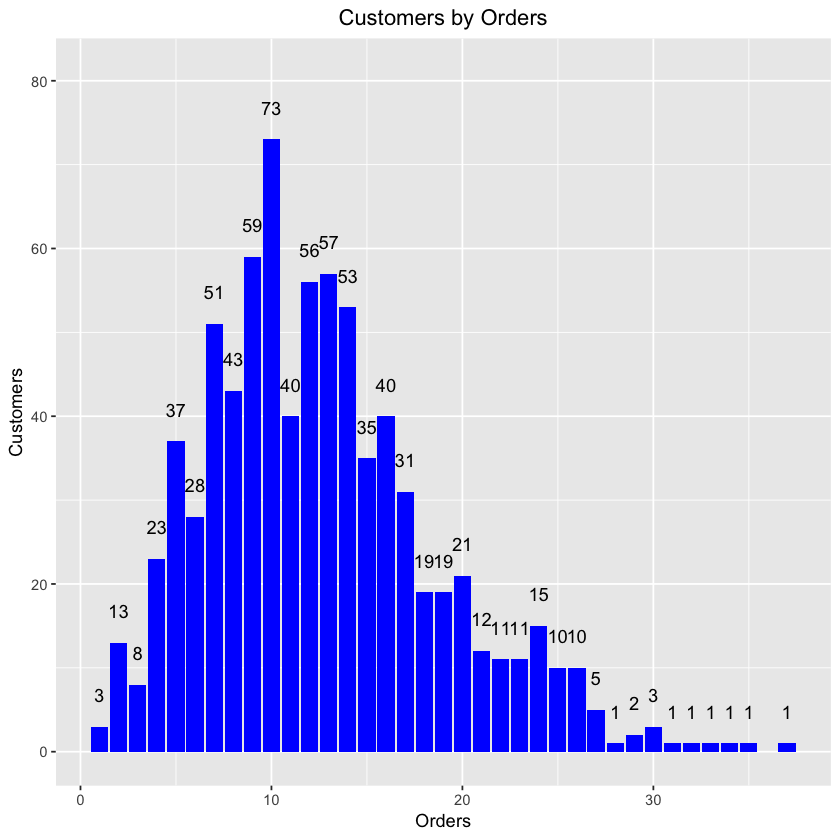

In [12]:
#Customers by orders
rfm_order_dist(rfm_result)

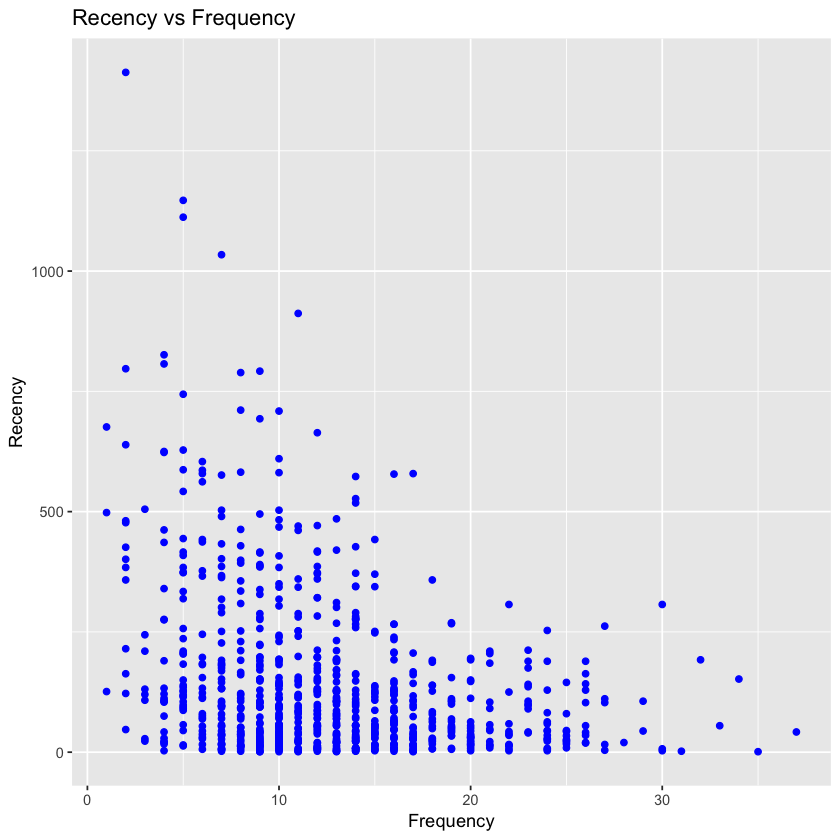

In [13]:
#Scatter plot (recencey vs freqeuncy)
rfm_rf_plot(rfm_result)

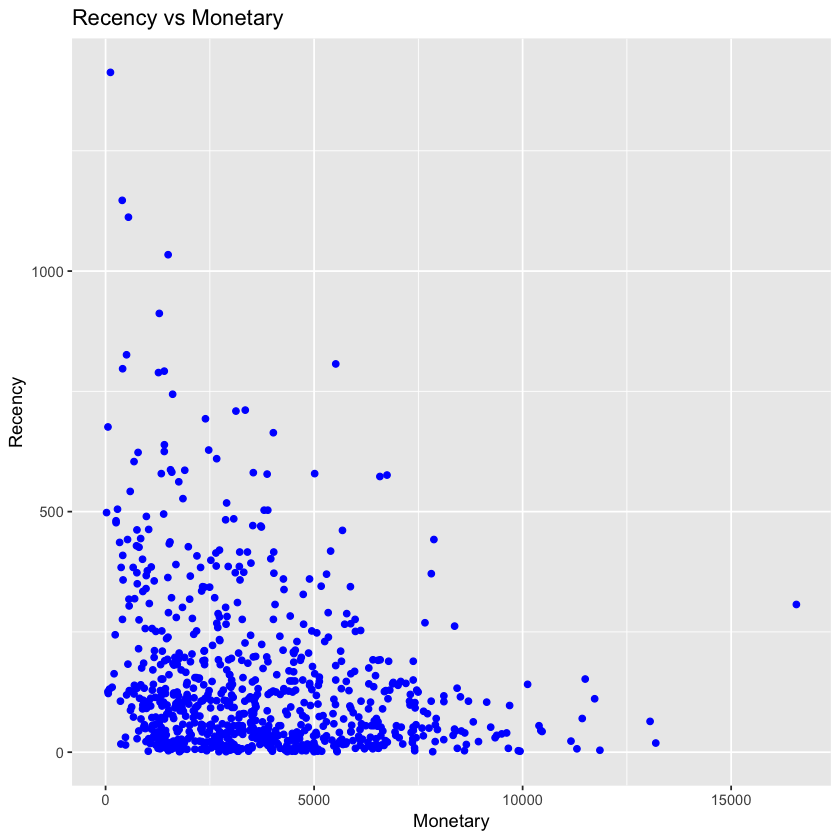

In [14]:
#Scatter plot (recency vs monetary)
rfm_rm_plot(rfm_result)

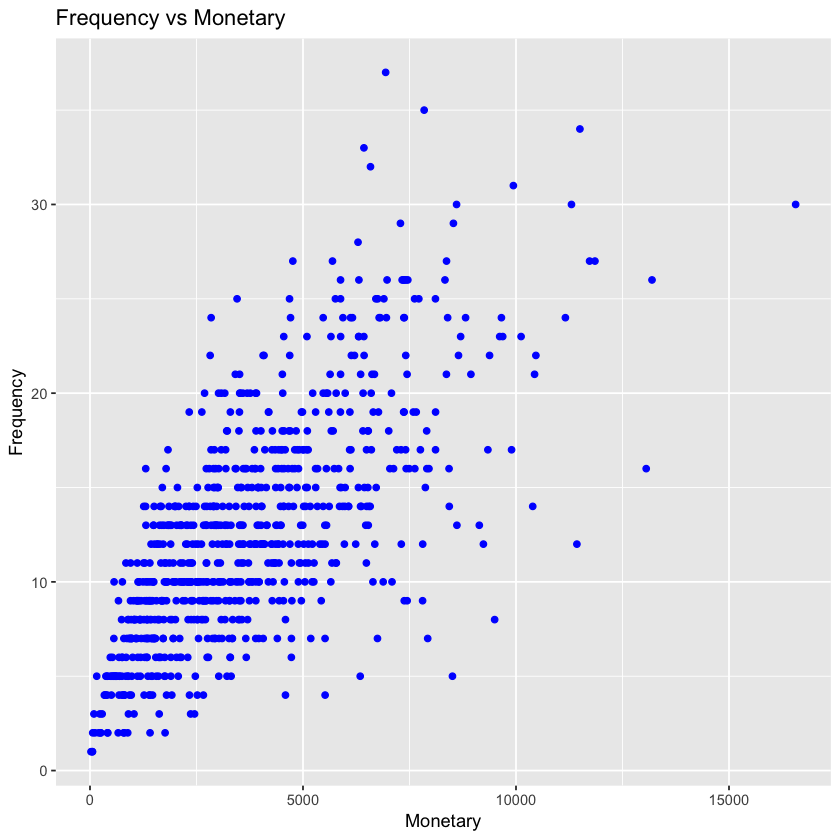

In [15]:
#Scatter plot (frequency vs monetary)
rfm_fm_plot(rfm_result)

##  <span style='color:royalblue'>  6. Perform segmentation based on the RFM score  </span>

##  <span style='color:royalblue'>  6.1. Define client segments  </span>

In [16]:
segment <- c(
  "Champions", "Loyal Customers", "Potential Loyalist",
  "Recent Customers", "Promising", "Need Attention",
  "About To Sleep", "At Risk", "Can't Lose Them", "Hibernating",
  "Lost"
)

description <- c(
  "Bought recently, buy often and spend the most",
  "Spend good money with us often. Responsive to promotions",
  "Recent customers, spent good amount, bought more than once",
  "Bought more recently, but not often",
  "Recent shoppers, but haven't spent much",
  "Above average recency, frequency & monetary values, may not have bought recently",
  "Below average recency, frequency & monetary values, will lose them if not reactivate",
  "Spent big money, purchased often but long time ago",
  "Made the biggest purchases and often, but long time ago",
  "Low spenders, low frequency, purchased long time ago",
  "Lowest recency, frequency & monetary scores"
)

action <- c("Show them your love. Can be early adopters for new products. Brand ambassdors",
            "They just need to do everything they do, but more. Engage them. Ask for more interactions",
            "Offer membership / loyalty program, recommend other products",
            "keep it heated, entice them with CRM",
            "Offer free trials, promotions, offer to have a second look",
            "Reactivation: Make limited time offers, recommend based on past purchases",
            "Share valuable resources, recommend popular products / renewals at discount, reconnect with them",
            "Ask them to come back! Reconnect",
            "Understand why they're gone. What went wrong? Talk to them",
            "Offer other relevant products, remind them about you, recreate brand value",
            "If must: revive interest with reach out campaign, ignore otherwise"
)

##  <span style='color:royalblue'>  6.2. Define scores for each segment  </span>

In [17]:
recency <- c("4 - 5", "2 - 5", "3 - 5", "4 - 5", "3 - 4", "2 - 3", "2 - 3", "<= 2", "<= 1", "1 - 2", "<= 2")
frequency <- c("4 - 5", "3 - 5", "1 - 3", "<= 1", "<= 1", "2 - 3", "<= 2", "2 - 5", "4 - 5", "1 - 2", "<= 2")
monetary <- c("4 - 5", "3 - 5", "1 - 3", "<= 1", "<= 1", "2 - 3", "<= 2", "2 - 5", "4 - 5", "1 - 2", "<= 2")

In [18]:
segments <- tibble(
  Segment = segment, Description = description, Action = action, R = recency, 'F'= frequency, M = monetary
)

##  <span style='color:royalblue'>  6.3. Display segments </span>

In [19]:
segments

Segment,Description,Action,R,F,M
Champions,"Bought recently, buy often and spend the most",Show them your love. Can be early adopters for new products. Brand ambassdors,4 - 5,4 - 5,4 - 5
Loyal Customers,Spend good money with us often. Responsive to promotions,"They just need to do everything they do, but more. Engage them. Ask for more interactions",2 - 5,3 - 5,3 - 5
Potential Loyalist,"Recent customers, spent good amount, bought more than once","Offer membership / loyalty program, recommend other products",3 - 5,1 - 3,1 - 3
Recent Customers,"Bought more recently, but not often","keep it heated, entice them with CRM",4 - 5,<= 1,<= 1
Promising,"Recent shoppers, but haven't spent much","Offer free trials, promotions, offer to have a second look",3 - 4,<= 1,<= 1
Need Attention,"Above average recency, frequency & monetary values, may not have bought recently","Reactivation: Make limited time offers, recommend based on past purchases",2 - 3,2 - 3,2 - 3
About To Sleep,"Below average recency, frequency & monetary values, will lose them if not reactivate","Share valuable resources, recommend popular products / renewals at discount, reconnect with them",2 - 3,<= 2,<= 2
At Risk,"Spent big money, purchased often but long time ago",Ask them to come back! Reconnect,<= 2,2 - 5,2 - 5
Can't Lose Them,"Made the biggest purchases and often, but long time ago",Understand why they're gone. What went wrong? Talk to them,<= 1,4 - 5,4 - 5
Hibernating,"Low spenders, low frequency, purchased long time ago","Offer other relevant products, remind them about you, recreate brand value",1 - 2,1 - 2,1 - 2


##  <span style='color:royalblue'>  6.4. Perform segmentation </span>

In [20]:
rfm_segments <- rfm_result %>%
  use_series(rfm) %>%
  mutate(
    segment = case_when(
      (recency_score %>% between(4,5)) & (frequency_score %>% between(4,5)) & 
        (monetary_score %>% between(4,5)) ~ "Champions",
      (recency_score %>% between(2, 5)) & (frequency_score %>% between(3, 5)) &
        (monetary_score %>% between(3, 5)) ~ "Loyal Customers",
      (recency_score %>% between(3, 5)) & (frequency_score %>% between(1, 3)) &
        (monetary_score %>% between(1, 3)) ~ "Potential Loyalist",
      (recency_score %>% between(4, 5)) & (frequency_score == 1) &
        (monetary_score == 1) ~ "New Customers",
      (recency_score %>% between(3, 4)) & (frequency_score == 1) &
        (monetary_score == 1) ~ "Promising",
      (recency_score %>% between(2, 3)) & (frequency_score %>% between(2, 3)) &
        (monetary_score %>% between(2, 3)) ~ "Needs Attention",
      (recency_score %>% between(2, 3)) & (frequency_score <= 2) &
        (monetary_score <= 2) ~ "About To Sleep",
      (recency_score <= 2) & (frequency_score %>% between(2, 5)) &
        (monetary_score %>% between(2, 5)) ~ "At Risk",
      (recency_score == 1) & (frequency_score %>% between(4, 5)) &
        (monetary_score %>% between(4, 5)) ~ "Cant Lose Them",
      (recency_score %>% between(1, 2)) & (frequency_score %>% between(1, 2)) &
        (monetary_score %>% between(1, 2)) ~ "Hibernating",
      (recency_score <= 2) & (frequency_score <= 2) &
        (monetary_score <= 2) ~ "Lost",
      TRUE ~ "Others"
    )
  ) %>%
  select(
    customer_id,segment, rfm_score, transaction_count, recency_days, amount
  )

##  <span style='color:royalblue'>  6.5. Inspect Segmentation </span>

In [21]:
rfm_segments %>%
  datatable(
    filter = "top",
    options = list(pageLength = 10, autoWidth = TRUE),
    colnames = c(
      "Customer ID", "RFM Segment","RFM Score","Orders", "Recency", "Total Spend"
    )
  )

HTML widgets cannot be represented in plain text (need html)

##  <span style='color:royalblue'>  7. Inspect Results </span>

##  <span style='color:royalblue'>  7.1. Checking Segment Size </span>

In [37]:
rfm_summary <- rfm_segments %>%
  group_by(segment) %>%
  tally() %>%
  rename(Segment = segment, Count = n) %>%
  mutate(percent = round((percent = Count / sum(Count) * 100),2)) %>%
  arrange(-Count)

rfm_summary

Segment,Count,percent
Loyal Customers,214,26.92
Potential Loyalist,180,22.64
Champions,120,15.09
At Risk,92,11.57
Hibernating,65,8.18
Others,60,7.55
About To Sleep,39,4.91
Needs Attention,25,3.14


##  <span style='color:royalblue'>  7.2. Median Recency </span>

`summarise()` ungrouping output (override with `.groups` argument)


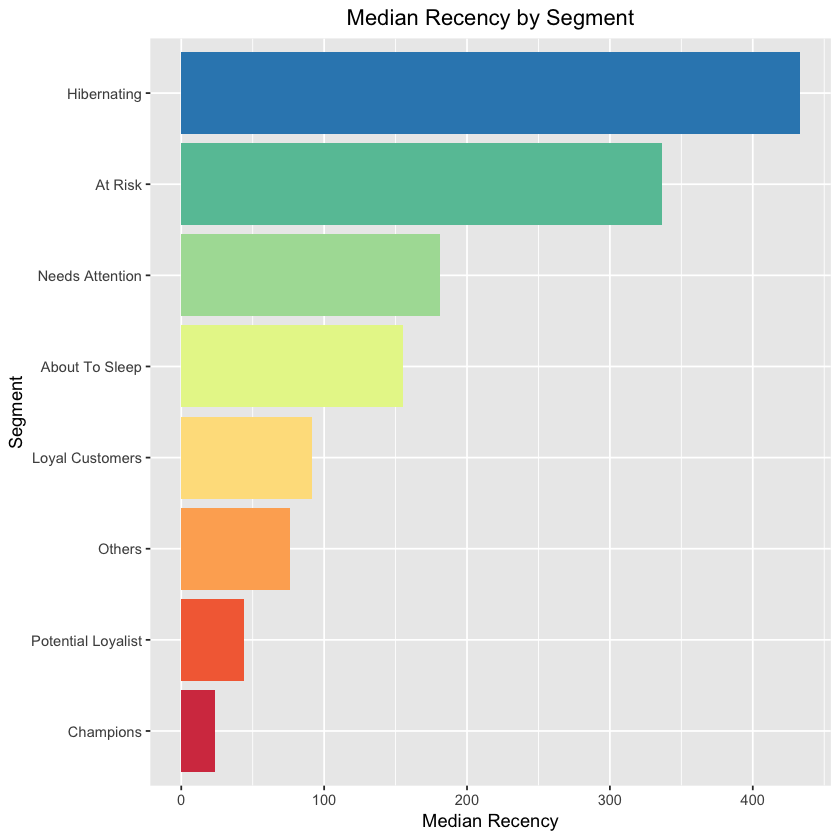

In [56]:
data <- rfm_segments %>%
  group_by(segment) %>%
  select(segment, recency_days) %>%
  summarize(median(recency_days)) %>%
  rename(segment = segment, avg_recency = 'median(recency_days)') %>%
  arrange(avg_recency)

n_fill <- nrow(data)

ggplot(data, aes(x = reorder(segment,avg_recency), avg_recency)) +
  geom_bar(stat="identity", fill = brewer.pal(n = n_fill, name= "Spectral")) +
  xlab("Segment") + ylab("Median Recency") +
  ggtitle("Median Recency by Segment") +
  coord_flip() +
  theme(
    plot.title = element_text(hjust = 0.5)
  )

##  <span style='color:royalblue'>  7.3. Median frequency </span>

`summarise()` ungrouping output (override with `.groups` argument)


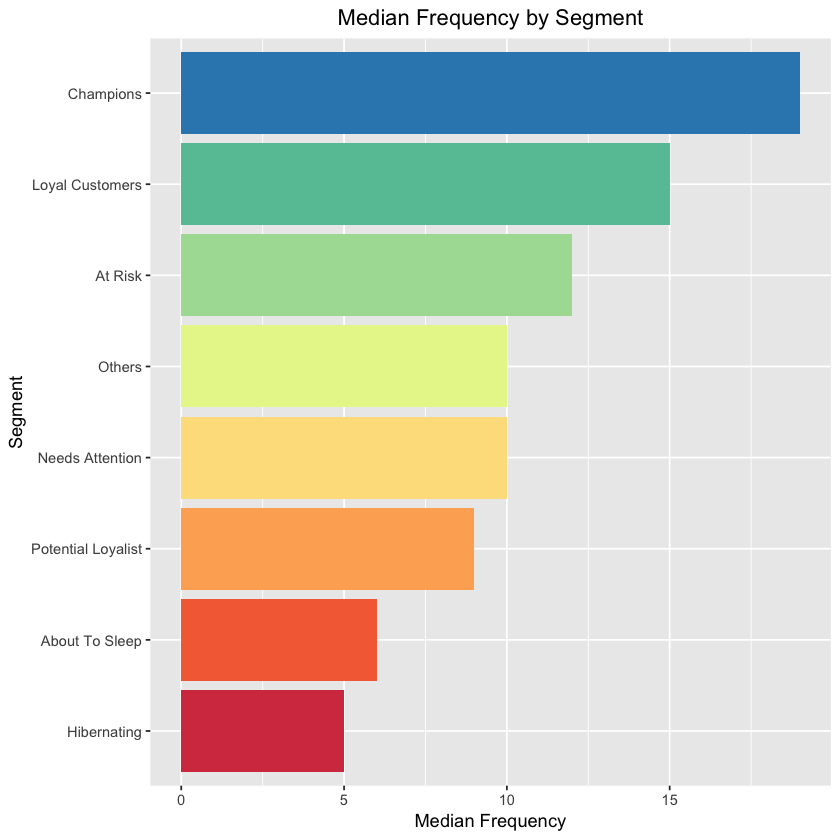

In [57]:

data <- 
  rfm_segments %>%
  group_by(segment) %>%
  select(segment, transaction_count) %>%
  summarize(median(transaction_count)) %>%
  rename(segment = segment, avg_frequency = `median(transaction_count)`) %>%
  arrange(avg_frequency) 

n_fill <- nrow(data)

ggplot(data, aes(x = reorder(segment, avg_frequency), avg_frequency)) +
  geom_bar(stat = "identity", fill = brewer.pal(n = n_fill, name = "Spectral")) +
  xlab("Segment") + ylab("Median Frequency") +
  ggtitle("Median Frequency by Segment") +
  coord_flip() +
  theme(
    plot.title = element_text(hjust = 0.5)
  )

##  <span style='color:royalblue'>  7.3. Median Monetary Value </span>

`summarise()` ungrouping output (override with `.groups` argument)


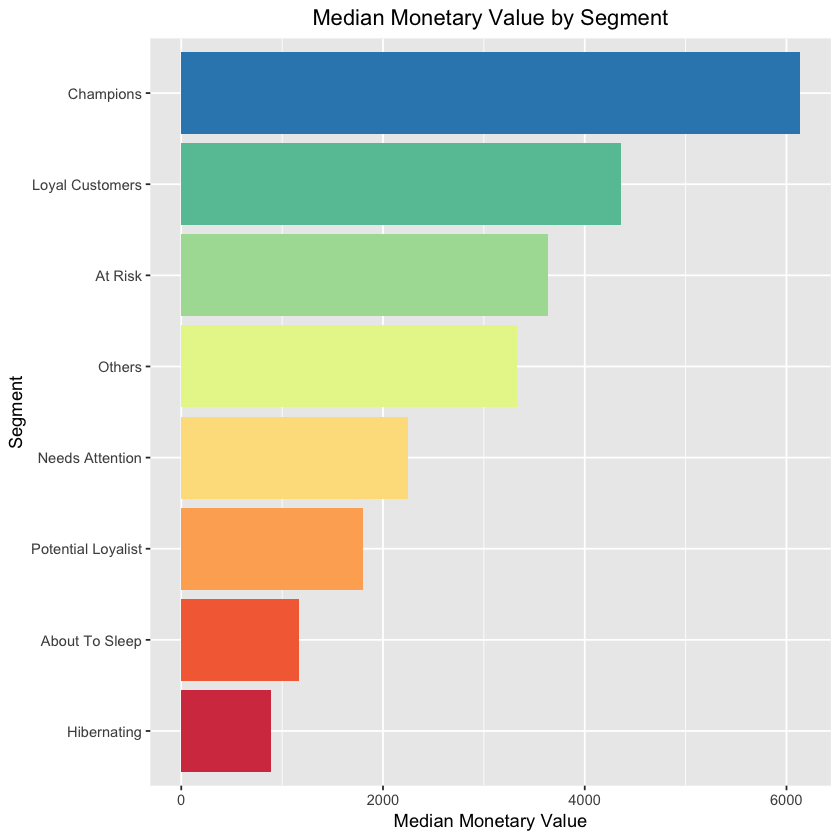

In [58]:
data <- 
  rfm_segments %>%
  group_by(segment) %>%
  select(segment, amount) %>%
  summarize(median(amount)) %>%
  rename(segment = segment, avg_monetary = `median(amount)`) %>%
  arrange(avg_monetary) 

n_fill <- nrow(data)

ggplot(data, aes(x= reorder(segment,avg_monetary), avg_monetary)) +
  geom_bar(stat = "identity", fill = brewer.pal(n = n_fill, name = "Spectral")) +
  xlab("Segment") + ylab("Median Monetary Value") +
  ggtitle("Median Monetary Value by Segment") +
  coord_flip() +
  theme(
    plot.title = element_text(hjust = 0.5)
  )

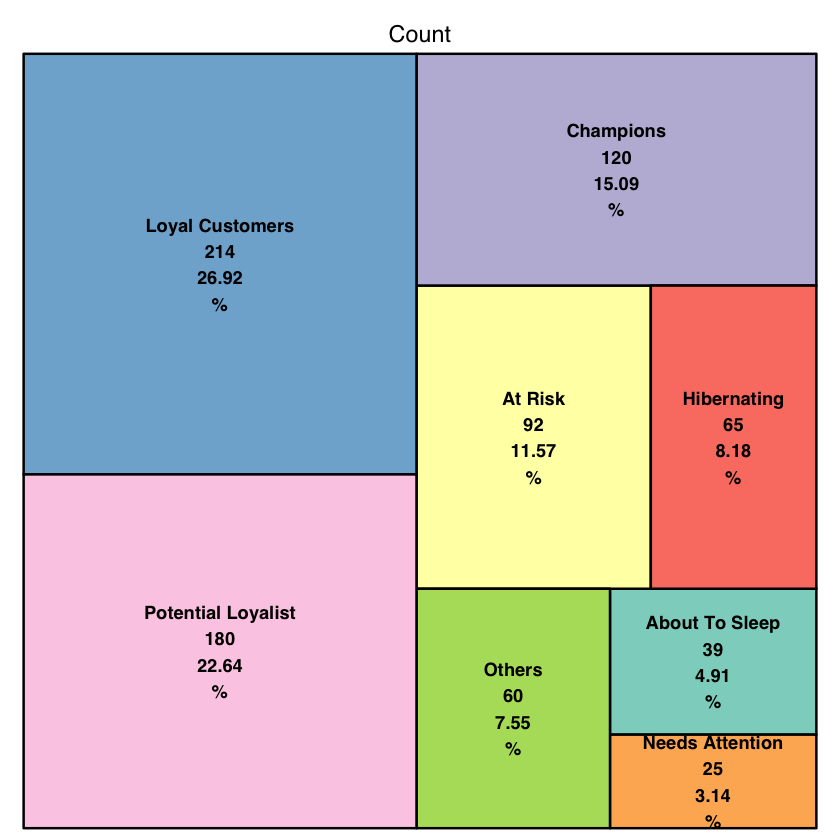

In [67]:
# Plotting an overview treemap
rfm_summary$label <- paste(rfm_summary$Segment, rfm_summary$Count, 
                           rfm_summary$percent, "%", sep = "\n")

treemap(rfm_summary,
        index=c("label"),
        vSize="Count",
        type="index",
        algorithm="pivotSize",
        palette = "Set3"
        
)